In [37]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/616228_PFE_2023-10-25_16h40.24.196.csv")
df.head()

,videos,trials.thisRepN,trials.thisTrialN,trials.thisN,trials.thisIndex,thisRow.t,notes,trial.started,movie.started,etRecord.started,...,mouse.rightButton,mouse.time,participant,session,date,expName,psychopyVersion,frameRate,expStart,Unnamed: 26
0,Video/ball-swept_volume.avi,0,0,0,3,0.138757,NaN,0.032020,0.138757,0.071261,...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.00031930021941661835, 0.02592690009623766, ...",616228,1,2023-10-25_16h40.24.196,PFE,2023.2.3,59.9009,2023-10-25 16h40.29.013618 +0200,NaN
1,Video/spot-elongated-2.avi,0,1,1,5,1.742225,NaN,1.467620,1.742225,0.230965,...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0001829999964684248, 0.0022456999868154526,...",616228,1,2023-10-25_16h40.24.196,PFE,2023.2.3,59.9009,2023-10-25 16h40.29.013618 +0200,NaN
2,Video/spot-original.avi,0,2,2,6,3.378850,NaN,3.094461,3.378850,0.235129,...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.00018420000560581684, 0.008067700080573559,...",616228,1,2023-10-25_16h40.24.196,PFE,2023.2.3,59.9009,2023-10-25 16h40.29.013618 +0200,NaN
3,Video/ball-original.avi,0,3,3,2,4.994138,NaN,4.726085,4.994138,0.220876,...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0001751999370753765, 0.0061578000895679, 0....",616228,1,2023-10-25_16h40.24.196,PFE,2023.2.3,59.9009,2023-10-25 16h40.29.013618 +0200,NaN
4,Video/spot-swept.avi,0,4,4,7,6.618402,NaN,6.342741,6.618402,0.228186,...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0001954999752342701, 0.00633240002207458, 0...",616228,1,2023-10-25_16h40.24.196,PFE,2023.2.3,59.9009,2023-10-25 16h40.29.013618 +0200,NaN


In [39]:
df = df[["videos","mouse.x","mouse.y"]]
df.head(16)

,videos,mouse.x,mouse.y
0,Video/ball-swept_volume.avi,"[-0.41203703703703703, -0.41203703703703703, -...","[-0.2574074074074074, -0.2574074074074074, -0...."
1,Video/spot-elongated-2.avi,"[0.37222222222222223, 0.1935185185185185, 0.19...","[-0.3101851851851852, -0.31666666666666665, -0..."
2,Video/spot-original.avi,"[0.375, 0.11574074074074074, 0.043518518518518...","[-0.36018518518518516, -0.337037037037037, -0...."
3,Video/ball-original.avi,"[0.36666666666666664, 0.21944444444444444, 0.1...","[-0.34074074074074073, -0.2935185185185185, -0..."
4,Video/spot-swept.avi,"[0.36574074074074076, 0.412962962962963, 0.412...","[-0.38055555555555554, -0.4166666666666667, -0..."
5,Video/spot-elongated-1.avi,"[0.3861111111111111, 0.3509259259259259, 0.312...","[-0.38055555555555554, -0.34814814814814815, -..."
6,Video/ball-elongated-2.avi,"[0.31203703703703706, -0.5657407407407408, -0....","[-0.275, -0.16111111111111112, -0.160185185185..."
7,Video/ball-elongated-1.avi,"[0.3814814814814815, 0.3287037037037037, 0.322...","[-0.4564814814814815, -0.41388888888888886, -0..."
8,Video/spot-elongated-2.avi,"[0.4675925925925926, 0.46111111111111114, 0.43...","[-0.47314814814814815, -0.46944444444444444, -..."
9,Video/spot-original.avi,"[0.43148148148148147, 0.43148148148148147, 0.4...","[-0.4212962962962963, -0.4212962962962963, -0...."


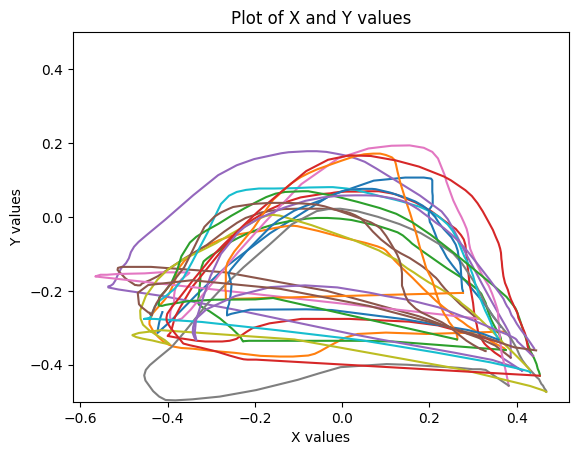

In [36]:
for i, values in enumerate(df.values):
    x = df.at[i,"mouse.x"]
    y = df.at[i,"mouse.y"]
    x = eval(x)
    y = eval(y)
    
    plt.plot(x,y)
    plt.xlabel('X values')
    plt.ylabel('Y values')
    plt.title('Plot of X and Y values')
    plt.ylim(-0.5, 0.5)